In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("startup_funding.csv")

In [4]:
df.shape

(3044, 10)

In [5]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [6]:
df.drop(['Remarks'],inplace=True,axis=1)

In [7]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [8]:
df.rename(columns={
        'Date dd/mm/yyyy':'date',
        'Startup Name':'start_up',
        'Industry Vertical':'vertical',
        'SubVertical':'subvertical',
        'City  Location':'city',
        'Investors Name':'investors',
        'InvestmentnType':'round',
        'Amount in USD':'amount'
    },inplace=True
)

In [9]:
df.head()

,Sr No,date,start_up,vertical,subvertical,city,investors,round,amount
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [10]:

df.iloc[[119]]

,Sr No,date,start_up,vertical,subvertical,city,investors,round,amount
119,120,04/12/2018,Manch,Social Media,Hyperlocal Content,Delhi,Stellaris Venture Partners,Seed Funding,"7,00,000"


In [11]:
df['amount']=df['amount'].fillna('0')
df['amount']

,amount
0,"20,00,00,000"
1,"80,48,394"
2,"1,83,58,860"
3,"30,00,000"
4,"18,00,000"
...,...
3039,"45,00,000"
3040,"8,25,000"
3041,"15,00,000"
3042,0


In [12]:
df.isnull().sum()

,0
Sr No,0
date,0
start_up,0
vertical,171
subvertical,936
city,180
investors,24
round,4
amount,0


In [13]:
df['amount']=df['amount'].str.replace(',','')
df['amount']=df['amount'].str.replace('undisclosed','0')
df['amount']=df["amount"].str.replace('unknown','0')
df['amount']=df['amount'].str.replace('Undisclosed','0')


In [14]:
df = df[df['amount'].str.isdigit()]

In [15]:
df['amount'] = df['amount'].astype('float')

/tmp/ipython-input-15-843972198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount'] = df['amount'].astype('float')


In [16]:
def to_inr(dollar):
  inr = dollar*82.5
  return inr/10000000

In [17]:
df['amount'] = df['amount'].apply(to_inr)

/tmp/ipython-input-17-2898200987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount'] = df['amount'].apply(to_inr)


In [18]:
df['amount']

,amount
0,1650.000000
1,66.399250
2,151.460595
3,24.750000
4,14.850000
...,...
3039,37.125000
3040,6.806250
3041,12.375000
3042,0.000000


In [19]:
df.head()

,Sr No,date,start_up,vertical,subvertical,city,investors,round,amount
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [20]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y',errors='coerce')


/tmp/ipython-input-20-3654090740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y',errors='coerce')


In [21]:
df.head()

,Sr No,date,start_up,vertical,subvertical,city,investors,round,amount
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [22]:
df['date'].value_counts()

,count
date,
2015-02-02,11
2015-07-08,11
2016-11-30,11
2016-10-04,10
2015-06-01,9
...,...
2019-11-11,1
2019-11-25,1
2019-10-04,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sr No        3029 non-null   int64         
 1   date         3022 non-null   datetime64[ns]
 2   start_up     3029 non-null   object        
 3   vertical     2858 non-null   object        
 4   subvertical  2104 non-null   object        
 5   city         2849 non-null   object        
 6   investors    3005 non-null   object        
 7   round        3027 non-null   object        
 8   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 236.6+ KB


In [24]:
df.head()

,Sr No,date,start_up,vertical,subvertical,city,investors,round,amount
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [25]:
df['date'].dt.day

,date
0,9.0
1,13.0
2,9.0
3,2.0
4,2.0
...,...
3039,29.0
3040,29.0
3041,30.0
3042,30.0


In [26]:
df.dropna(subset=['date','start_up','vertical','subvertical','city','investors','round','amount'])

,Sr No,date,start_up,vertical,subvertical,city,investors,round,amount
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000
...,...,...,...,...,...,...,...,...,...
2103,2104,2016-01-29,Rare Media,Technology,Mobile & Cloud based App developer,New Delhi,Info Edge (India) Ltd,Private Equity,9.075000
2104,2105,2016-01-29,TinMen,Consumer Internet,Food Delivery Platform,Hyderabad,Lead Angel Network,Seed Funding,0.000000
2105,2106,2016-01-29,CodingLabs,Technology,Coding Skill Showcase & Resume Builder,Hyderabad,Vineet Nalla,Seed Funding,0.000000
2106,2107,2016-01-30,FindUrClass,Consumer Internet,Hobby & Activity Class Aggregator,Mumbai,"Amit Patni, Anirudh Damani, Samir Shah",Seed Funding,0.000000


In [27]:
df.to_csv('startup_cleaned.csv',index=False)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sr No        3029 non-null   int64         
 1   date         3022 non-null   datetime64[ns]
 2   start_up     3029 non-null   object        
 3   vertical     2858 non-null   object        
 4   subvertical  2104 non-null   object        
 5   city         2849 non-null   object        
 6   investors    3005 non-null   object        
 7   round        3027 non-null   object        
 8   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 236.6+ KB


In [29]:
df['investors'] = df['investors'].astype(str)

sorted(set(df['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [30]:
## IMP CELL
df[df['investors'].str.contains('IDG Ventures')].head()[['date','start_up','vertical','subvertical','city','investors','round','amount']]

,date,start_up,vertical,subvertical,city,investors,round,amount
101,2019-04-13,Tripoto,Social Media,Travel,New Delhi,"Orchid India, Hornbill Orchid India Fund, Chir...",Series B,29.628844
222,2018-07-30,Cure Fit,Consumer Internet,Health and fitness Platform,Bengaluru,"IDG Ventures, Accel Partners, Kalaari Capital ...",Private Equity,990.000000
258,2018-05-02,Bizongo,Consumer Internet,Aggregator For Packaging Material,Mumbai,"B Capital, International Finance Corporation (...",Private Equity,181.500000
309,2018-04-26,POPxo,Technology,Women Focussed Digital Media Platform,Delhi,"Neoplux, OPPO, IDG Ventures India, Kalaari Cap...",Private Equity,45.375000
438,2017-12-07,eShakti,Ecommerce,"""Women\\'s Fashion Clothing Online Platform""",Chennai,IDG Ventures,Debt Funding,18.975000


In [31]:
df[df['investors'].str.contains('IDG Ventures')].groupby('start_up')['amount'].sum().sort_values(ascending=False)

,amount
start_up,
Cure Fit,990.000000
Lenskart,495.000000
CureFit,206.250000
Bizongo,206.250000
Fintellix,123.750000
Vserv,123.750000
Curefit,123.750000
Xpressbees,103.125000
FirstCry.com,82.500000


<Axes: ylabel='amount'>

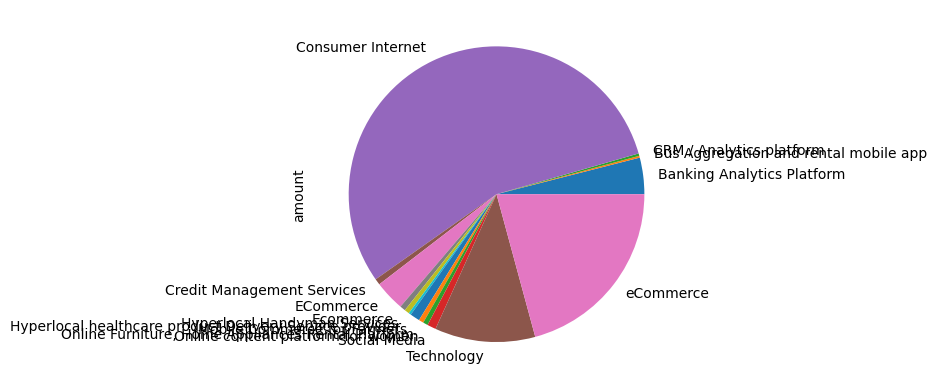

In [32]:
##imp cell
df[df['investors'].str.contains('IDG Ventures')].groupby('vertical')['amount'].sum().plot(kind='pie')

<Axes: ylabel='amount'>

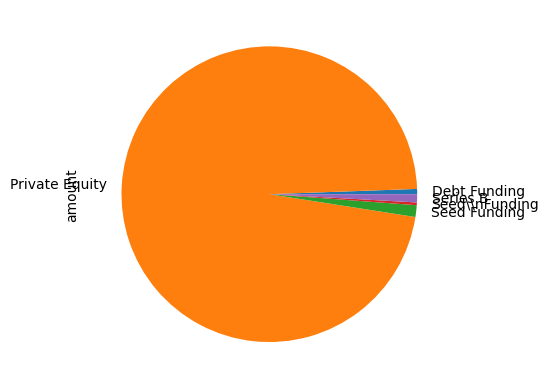

In [33]:
##imp cell
df[df['investors'].str.contains('IDG Ventures')].groupby('round')['amount'].sum().plot(kind='pie')

<Axes: ylabel='amount'>

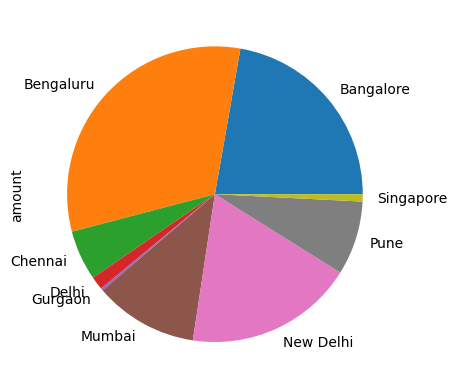

In [34]:
##iMP
df[df['investors'].str.contains('IDG Ventures')].groupby('city')['amount'].sum().plot(kind='pie')

In [35]:
df['year'] = df['date'].dt.year

<Axes: xlabel='year'>

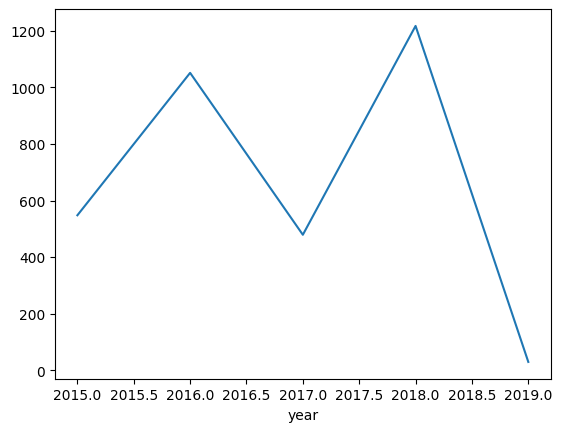

In [36]:
df[df['investors'].str.contains('IDG Ventures')].groupby('year')['amount'].sum().plot()

In [37]:
round(df['amount']).sum()

np.float64(313680.0)

In [38]:
round(df['amount']).max()

32175.0

In [39]:
df[df['amount'] == 32175.0]

,Sr No,date,start_up,vertical,subvertical,city,investors,round,amount,year
60,61,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,32175.0,2019.0


In [40]:
df.groupby('start_up')['amount'].max().sort_values(ascending=False)

,amount
start_up,
Rapido Bike Taxi,32175.0
Flipkart,20625.0
Paytm,11550.0
Flipkart.com,5775.0
True North,4950.0
...,...
Cartisan,0.0
GlamStudios,0.0
SmartHi,0.0


In [41]:
df.groupby('start_up')['amount'].max().sort_values(ascending=False).head(1).values[0]

np.float64(32175.0)

In [42]:
df.groupby('start_up')['amount'].sum().mean()

np.float64(128.1816767444853)

In [43]:
df['start_up'].nunique()

2448

In [44]:
df['month'] = df['date'].dt.month


In [45]:
df.head()

,Sr No,date,start_up,vertical,subvertical,city,investors,round,amount,year,month
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020.0,1.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020.0,1.0
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020.0,1.0
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020.0,1.0
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020.0,1.0


In [46]:
df.to_csv("new.csv")
df

,Sr No,date,start_up,vertical,subvertical,city,investors,round,amount,year,month
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020.0,1.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020.0,1.0
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020.0,1.0
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020.0,1.0
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3039,3040,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,37.125000,2015.0,1.0
3040,3041,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,6.806250,2015.0,1.0
3041,3042,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,12.375000,2015.0,1.0
3042,3043,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,0.000000,2015.0,1.0


In [47]:
df["start_up"].value_counts()

,count
start_up,
Swiggy,8
Ola Cabs,8
Paytm,7
NoBroker,6
Meesho,6
...,...
ChipperSage,1
SelectJobs,1
Lets Transport,1


In [48]:
df.groupby(['year','month'])['start_up'].count()

year    month
2015.0  1.0       51
        2.0       55
        3.0       60
        4.0       62
        5.0       59
        6.0       86
        7.0       86
        8.0       98
        9.0       88
        10.0      93
        11.0      92
        12.0      89
2016.0  1.0      104
        2.0      100
        3.0       85
        4.0       79
        5.0       79
        6.0       98
        7.0       64
        8.0       87
        9.0       73
        10.0      80
        11.0      72
        12.0      72
2017.0  1.0       72
        2.0       48
        3.0       71
        4.0       71
        5.0       68
        6.0       65
        7.0       43
        8.0       45
        9.0       58
        10.0      53
        11.0      50
        12.0      43
2018.0  1.0       37
        2.0       42
        3.0       35
        4.0       35
        5.0       23
        6.0       32
        7.0       35
        8.0       25
        9.0       13
        10.0       7
        11.0      18
        12.0       7
2019.0  1.0        3
        2.0        3
        4.0       13
        5.0        9
        6.0       12
        7.0       13
        8.0       17
        9.0        9
        10.0       3
        11.0      15
        12.0      10
2020.0  1.0        7
Name: start_up, dtype: int64

In [49]:
temp_df = df.groupby(['year','month'])['amount'].sum().reset_index()

In [50]:
temp_df['month'].astype(str) +'-'+ temp_df['year'].astype(str)

,0
0,1.0-2015.0
1,2.0-2015.0
2,3.0-2015.0
3,4.0-2015.0
4,5.0-2015.0
5,6.0-2015.0
6,7.0-2015.0
7,8.0-2015.0
8,9.0-2015.0
9,10.0-2015.0


In [51]:
temp_df['X_axis'] = temp_df['month'].astype(str) +'-'+ temp_df['year'].astype(str)

In [52]:
temp_df['X_axis']

,X_axis
0,1.0-2015.0
1,2.0-2015.0
2,3.0-2015.0
3,4.0-2015.0
4,5.0-2015.0
5,6.0-2015.0
6,7.0-2015.0
7,8.0-2015.0
8,9.0-2015.0
9,10.0-2015.0


In [53]:
!pip install plotly


In [54]:
# prompt: import plotly

import plotly.express as px
fig = px.line(temp_df,x='X_axis',y='amount')
fig.show()

In [55]:
df.head()

,Sr No,date,start_up,vertical,subvertical,city,investors,round,amount,year,month
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020.0,1.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020.0,1.0
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020.0,1.0
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020.0,1.0
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020.0,1.0


In [56]:
new = pd.read_csv("new.csv")

In [57]:
new.head()

,Unnamed: 0,Sr No,date,start_up,vertical,subvertical,city,investors,round,amount,year,month
0,0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020.0,1.0
1,1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020.0,1.0
2,2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020.0,1.0
3,3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020.0,1.0
4,4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020.0,1.0


In [58]:
new.drop(columns=['Sr No'], errors='ignore', inplace=True)

In [59]:
new.head()

,Unnamed: 0,date,start_up,vertical,subvertical,city,investors,round,amount,year,month
0,0,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020.0,1.0
1,1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020.0,1.0
2,2,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020.0,1.0
3,3,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020.0,1.0
4,4,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020.0,1.0


In [60]:
new.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)

In [61]:
new.head()

,date,start_up,vertical,subvertical,city,investors,round,amount,year,month
0,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020.0,1.0
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020.0,1.0
2,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020.0,1.0
3,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020.0,1.0
4,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020.0,1.0


In [62]:
new.to_csv("final.csv")

In [63]:
new["start_up"].rename("startup",inplace=True)

,startup
0,BYJU’S
1,Shuttl
2,Mamaearth
3,https://www.wealthbucket.in/
4,Fashor
...,...
3024,Printvenue
3025,Graphene
3026,Mad Street Den
3027,Simplotel


In [64]:
new = pd.read_csv("final.csv")

new = new.dropna(subset=['investors'])

In [65]:
new.head()

,Unnamed: 0,date,start_up,vertical,subvertical,city,investors,round,amount,year,month
0,0,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020.0,1.0
1,1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020.0,1.0
2,2,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020.0,1.0
3,3,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020.0,1.0
4,4,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020.0,1.0


In [66]:
new.to_csv("final_data.csv")

In [67]:
new.rename(columns={'start_up': 'startup'}, inplace=True)

new = new.set_index('date')

In [68]:
new.head()

,Unnamed: 0,startup,vertical,subvertical,city,investors,round,amount,year,month
date,,,,,,,,,,
2020-01-09,0,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020.0,1.0
2020-01-13,1,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020.0,1.0
2020-01-09,2,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020.0,1.0
2020-01-02,3,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020.0,1.0
2020-01-02,4,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020.0,1.0


In [69]:
new.to_csv("final_csv.csv")

In [70]:
new["startup"].value_counts().cumsum()

,count
startup,
Swiggy,8
Ola Cabs,16
Paytm,23
Nykaa,29
Medinfi,35
...,...
BetaOut,3001
RML Agtech,3002
LoyaltyPrime,3003


In [71]:
new['count'] = 1

In [72]:
new.head()

,Unnamed: 0,startup,vertical,subvertical,city,investors,round,amount,year,month,count
date,,,,,,,,,,,
2020-01-09,0,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020.0,1.0,1
2020-01-13,1,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020.0,1.0,1
2020-01-09,2,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020.0,1.0,1
2020-01-02,3,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020.0,1.0,1
2020-01-02,4,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020.0,1.0,1


In [73]:
new.head()

,Unnamed: 0,startup,vertical,subvertical,city,investors,round,amount,year,month,count
date,,,,,,,,,,,
2020-01-09,0,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020.0,1.0,1
2020-01-13,1,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020.0,1.0,1
2020-01-09,2,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020.0,1.0,1
2020-01-02,3,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020.0,1.0,1
2020-01-02,4,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020.0,1.0,1


In [74]:
new["count"] = new["count"].cumsum()

In [75]:
new.head()

,Unnamed: 0,startup,vertical,subvertical,city,investors,round,amount,year,month,count
date,,,,,,,,,,,
2020-01-09,0,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020.0,1.0,1
2020-01-13,1,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020.0,1.0,2
2020-01-09,2,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020.0,1.0,3
2020-01-02,3,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020.0,1.0,4
2020-01-02,4,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020.0,1.0,5


In [76]:
new['count'] = new['startup'].value_counts().sort_index(ascending=False).cumsum()

In [77]:
new.head()

,Unnamed: 0,startup,vertical,subvertical,city,investors,round,amount,year,month,count
date,,,,,,,,,,,
2020-01-09,0,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020.0,1.0,NaN
2020-01-13,1,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020.0,1.0,NaN
2020-01-09,2,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020.0,1.0,NaN
2020-01-02,3,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020.0,1.0,NaN
2020-01-02,4,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020.0,1.0,NaN


In [78]:
january_2020_startups = new[(new['year'] == 2020) & (new['month'] == 1)]
num_startups_jan_2020 = january_2020_startups['startup'].nunique()
print(f"Number of startups in January 2020: {num_startups_jan_2020}")

Number of startups in January 2020: 7


In [79]:
st_count = new.groupby(['year', 'month'])['startup'].count().reset_index()
st_count = st_count.rename(columns={'startup': 'st_count'})

new = pd.merge(new, st_count, on=['year', 'month'], how='left')


In [80]:
new.head()

,Unnamed: 0,startup,vertical,subvertical,city,investors,round,amount,year,month,count,st_count
0,0,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020.0,1.0,NaN,7.0
1,1,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020.0,1.0,NaN,7.0
2,2,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020.0,1.0,NaN,7.0
3,3,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020.0,1.0,NaN,7.0
4,4,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020.0,1.0,NaN,7.0


In [81]:
new.drop(columns=["count"],inplace=True)


In [82]:
new.to_csv("final_deta.csv")

In [83]:
import plotly.express as px

new['month_year'] = new['month'].astype(str) + '-' + new['year'].astype(str)

fig = px.line(new, x='month_year', y='st_count')

fig.update_layout(title='Startup Count over Time',
                  xaxis_title='Month-Year',
                  yaxis_title='Startup Count')

fig.show()

In [84]:
h = pd.read_csv("final_deta.csv")

In [85]:
h.head()

,Unnamed: 0.1,Unnamed: 0,startup,vertical,subvertical,city,investors,round,amount,year,month,st_count
0,0,0,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020.0,1.0,7.0
1,1,1,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020.0,1.0,7.0
2,2,2,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020.0,1.0,7.0
3,3,3,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020.0,1.0,7.0
4,4,4,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020.0,1.0,7.0


In [86]:

new.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)
new = new.set_index('date')
new.head()

KeyError: "None of ['date'] are in the columns"

In [ ]:
h.head()

In [ ]:
h.drop(columns=["Unnamed: 0"],inplace=True)

In [ ]:
h.head()

In [ ]:
h = pd.read_csv("final_deta.csv")
h.drop(columns=["Unnamed: 0"],inplace=True)

vertical_counts = h.groupby('vertical')['startup'].count()

fig = px.pie(values=vertical_counts.values, names=vertical_counts.index, title='Distribution of Startups Across Verticals')
fig.show()

In [ ]:
vertical_counts = h.groupby('vertical')['startup'].count()

vertical_percentages = vertical_counts / vertical_counts.sum() * 100

filtered_verticals = vertical_percentages[vertical_percentages >= 0.1]
fig = px.pie(values=filtered_verticals.values,
             names=filtered_verticals.index,
             title='Distribution of Startups Across Verticals (>=0.1%)',
             hole=0.3)
fig.update_traces(textposition='none')
fig.update_layout(width=800, height=600)

fig.show()

In [ ]:
vertical_counts = h.groupby('vertical')['startup'].count()
total_startups = vertical_counts.sum()
filtered_verticals = vertical_counts[vertical_counts / total_startups * 100 >= 0.1]
fig = go.Figure(data=[go.Bar(x=filtered_verticals.index, y=filtered_verticals.values)])
fig.update_layout(title='Distribution of Startups Across Verticals (excluding <0.1%)',
                  xaxis_title='Industry Vertical',
                  yaxis_title='Number of Startups')

fig.show()

In [ ]:
unique_rounds = h['round'].unique()
unique_rounds

In [ ]:
unique_rounds = h['round'].value_counts()
unique_rounds

In [ ]:
h = pd.read_csv("final_deta.csv")
h.drop(columns=["Unnamed: 0"], inplace=True)

round_counts = h.groupby('round')['startup'].count()
round_counts = round_counts[round_counts > 1]

fig = px.pie(values=round_counts.values,
             names=round_counts.index,
             title='Distribution of Funding Rounds (Excluding Single Contributions)')

fig.update_traces(textposition='none')

fig.show()

In [ ]:
h["city"].nunique()

In [ ]:
investor_name = input("Enter the investor name: ")
recent_investments = h[h['investors'].str.contains(investor_name, na=False)].sort_values(by='date', ascending=False).head(5)
print(recent_investments[['date', 'startup', 'vertical', 'subvertical', 'city', 'investors', 'round', 'amount']])

In [ ]:
# prompt: take a input as investor name and give back there investment in vertical using bar_chart using plottly

import pandas as pd
import plotly.express as px

# Load the dataframe
h = pd.read_csv("final_deta.csv")
h.drop(columns=["Unnamed: 0"], inplace=True)

investor_name = input("Enter the investor name: ")

# Filter the DataFrame for the given investor
investor_df = h[h['investors'].str.contains(investor_name, na=False)]

# Group by vertical and sum the amount invested
vertical_investment = investor_df.groupby('vertical')['amount'].sum()

# Create the bar chart
fig = px.bar(x=vertical_investment.index, y=vertical_investment.values,
             labels={'x': 'Vertical', 'y': 'Total Investment Amount'},
             title=f'Investment by {investor_name} in Different Verticals')
fig.show()

In [ ]:
# prompt: take a input as investor name and give back there biggest investment by groupin amount and startup using pie_chart plottly

import pandas as pd
import plotly.express as px

# Load the dataframe (assuming 'h' DataFrame is already loaded and processed)
h = pd.read_csv("final_deta.csv")
h.drop(columns=["Unnamed: 0"], inplace=True)

investor_name = input("Enter the investor name: ")

# Filter the DataFrame for the given investor
investor_df = h[h['investors'].str.contains(investor_name, na=False)]

if investor_df.empty:
    print(f"No investments found for investor: {investor_name}")
else:
    # Group by startup and sum the amount invested
    startup_investment = investor_df.groupby('startup')['amount'].sum()

    # Create the pie chart

    fig = px.pie(values=startup_investment.values,
                 names=startup_investment.index,
                 title=f'Investment Distribution of {investor_name} across Startups')
    fig.show()

In [ ]:
h.head()

In [ ]:
# prompt: take a input as investor name and give back there Year on Year investment using plotly

# Load the dataframe (assuming 'h' DataFrame is already loaded and processed)
h = pd.read_csv("final_deta.csv")
h.drop(columns=["Unnamed: 0"], inplace=True)

investor_name = input("Enter the investor name: ")

# Filter the DataFrame for the given investor
investor_df = h[h['investors'].str.contains(investor_name, na=False)]

if investor_df.empty:
    print(f"No investments found for investor: {investor_name}")
else:
    # Group by year and sum the amount invested
    yearly_investment = investor_df.groupby('year')['amount'].sum()

    # Create the line chart using Plotly
    fig = px.line(x=yearly_investment.index, y=yearly_investment.values,
                  labels={'x': 'Year', 'y': 'Total Investment Amount'},
                  title=f'Year-on-Year Investment by {investor_name}')
    fig.show()

In [ ]:
# prompt: take a input as investor name and give back there Month on Month investment using plotly

import pandas as pd
import plotly.express as px

# Load the dataframe
h = pd.read_csv("final_deta.csv")
h.drop(columns=["Unnamed: 0"], inplace=True)

investor_name = input("Enter the investor name: ")

# Filter the DataFrame for the given investor
investor_df = h[h['investors'].str.contains(investor_name, na=False)]

if investor_df.empty:
    print(f"No investments found for investor: {investor_name}")
else:
    # Convert 'date' column to datetime objects
    investor_df['date'] = pd.to_datetime(investor_df['date'])

    # Group by month and year, then sum the investment amounts

    # Rename the 'date' column (level_1) to avoid conflict
    monthly_investment = monthly_investment.rename(columns={'level_1': 'month'})

    # Create a 'month-year' column for plotting
    monthly_investment['month_year'] = monthly_investment['month'].astype(str) + '-' + monthly_investment['year'].astype(str)

    # Create the line chart using Plotly
    fig = px.line(monthly_investment, x='month_year', y='amount',
                  labels={'month_year': 'Month-Year', 'amount': 'Total Investment Amount'},
                  title=f'Month-on-Month Investment by {investor_name}')
    fig.show()

In [ ]:
# prompt: take input as startup name and give the  Distributionof startup in various verticals show by pie chat using plotly

import pandas as pd
import plotly.express as px

# Load the dataframe
h = pd.read_csv("final_deta.csv")
h.drop(columns=["Unnamed: 0"], inplace=True)

startup_name = input("Enter the startup name: ")

# Filter the DataFrame for the given startup
startup_df = h[h['startup'] == startup_name]

if startup_df.empty:
    print(f"No data found for startup: {startup_name}")
else:
    # Group by vertical and count the number of investments
    vertical_counts = startup_df.groupby('vertical')['startup'].count()

    # Create the pie chart
    fig = px.pie(values=vertical_counts.values,
                 names=vertical_counts.index,
                 title=f'Distribution of Investments for {startup_name} across Verticals')
    fig.show()

In [ ]:
# prompt: take input as startup name and give the  Distributionof startup in various subverticals show by pie chat using plotly

import pandas as pd
import plotly.express as px

# Load the dataframe
h = pd.read_csv("final_deta.csv")
h.drop(columns=["Unnamed: 0"], inplace=True)

startup_name = input("Enter the startup name: ")

# Filter the DataFrame for the given startup
startup_df = h[h['startup'] == startup_name]

if startup_df.empty:
    print(f"No data found for startup: {startup_name}")
else:
    # Group by subvertical and count the number of investments
    subvertical_counts = startup_df.groupby('subvertical')['startup'].count()

    # Create the pie chart
    fig = px.pie(values=subvertical_counts.values,
                 names=subvertical_counts.index,
                 title=f'Distribution of Investments for {startup_name} across Subverticals')
    fig.show()

In [ ]:
# prompt: plot graph between month and amount for perticular startup

import pandas as pd
import plotly.express as px

# Load the dataframe
h = pd.read_csv("final_deta.csv")
h.drop(columns=["Unnamed: 0"], inplace=True)

startup_name = input("Enter the startup name: ")

# Filter the DataFrame for the given startup
startup_df = h[h['startup'] == startup_name]

if startup_df.empty:
    print(f"No data found for startup: {startup_name}")
else:
    # Create a 'month-year' column for plotting
    startup_df['month_year'] = startup_df['month'].astype(str) + '-' + startup_df['year'].astype(str)

    # Group by month-year and sum the investment amounts
    monthly_investment = startup_df.groupby('month_year')['amount'].sum().reset_index()

    # Create the line chart using Plotly
    fig = px.line(monthly_investment, x='month_year', y='amount',
                  labels={'month_year': 'Month-Year', 'amount': 'Total Investment Amount'},
                  title=f'Month-on-Month Investment for {startup_name}')
    fig.show()